In [13]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load the JSON data
data = []
with open('C:/Users/Jeremy/nba_analysis/notebooks/player_movements.json', 'r') as file:
    for line in file:
        data.append(json.loads(line))

In [15]:
# Convert JSON data to DataFrame
df = pd.json_normalize(data)

In [16]:
# Define year bins and categories
bins = [0, 1980, 1999, 2015, 2024]  # Adjust the end year as needed
labels = ['Beginning-1980', '1980-1999', '1999-2015', '2015-Present']

In [17]:
# Ensure 'Year 1' is in the correct type
df['Year 1'] = df['Year 1'].astype(int)

In [18]:
# Create a new column for the binned years
df['Year Bin'] = pd.cut(df['Year 1'], bins=bins, labels=labels, right=False)

In [19]:
# Create output directory
output_dir = 'C:/Users/Jeremy/nba_analysis/notebooks/Binned Frequency Outputs'
os.makedirs(output_dir, exist_ok=True)

In [20]:
# Function to plot and save frequency bar graphs
def plot_and_save_frequency_bar_graph(data, column, title, xlabel, ylabel, filename):
    plt.figure(figsize=(14, 8))
    sns.countplot(data=data, x=column)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()  # Ensure everything fits
    plt.savefig(filename)
    plt.show()

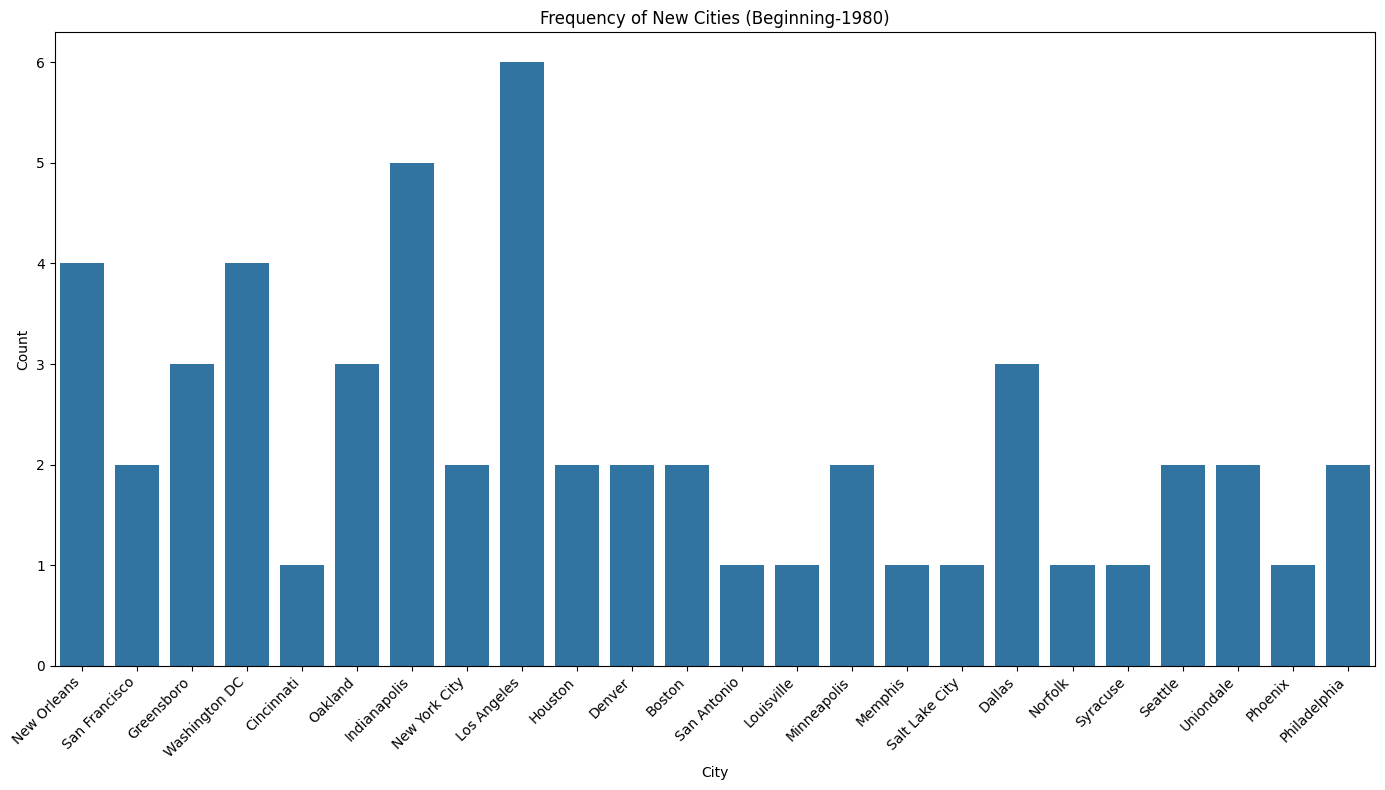

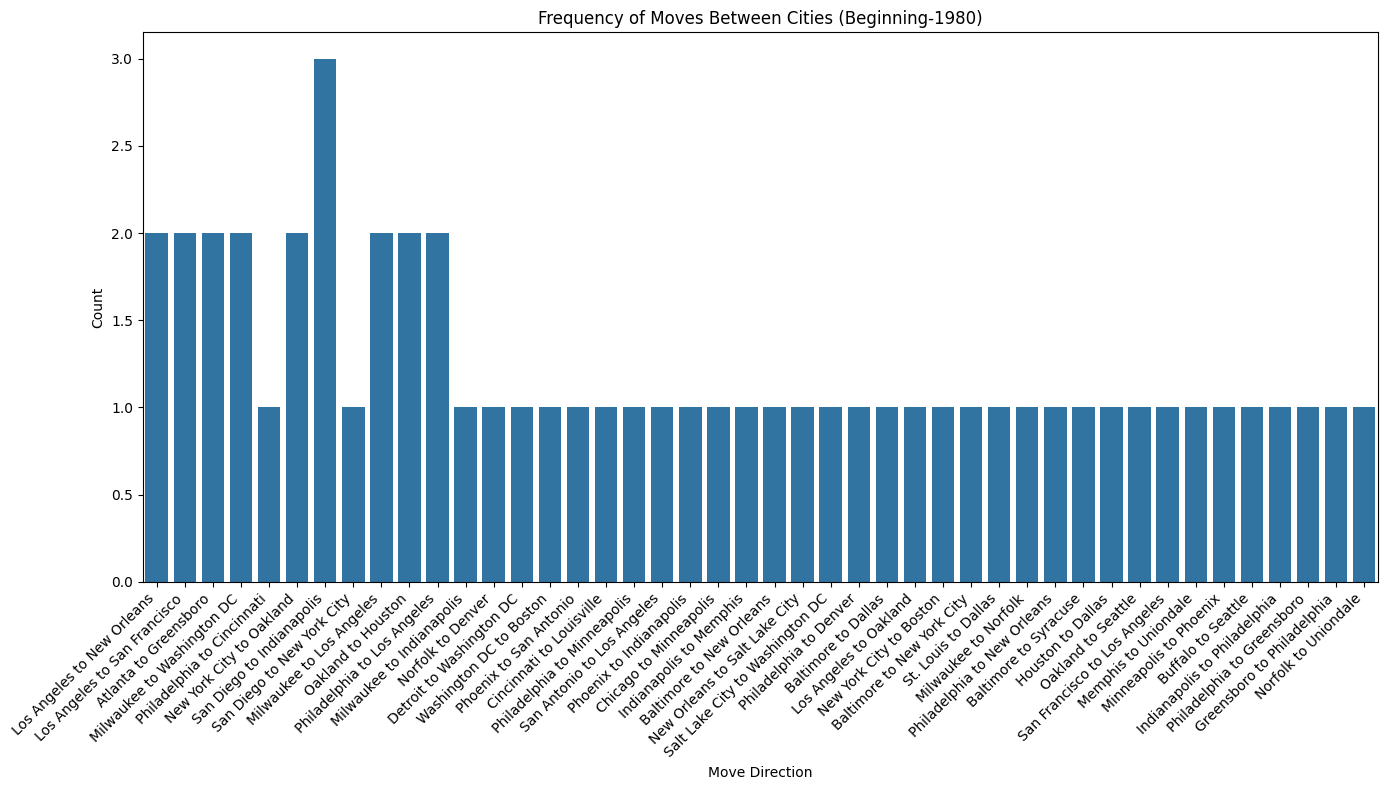

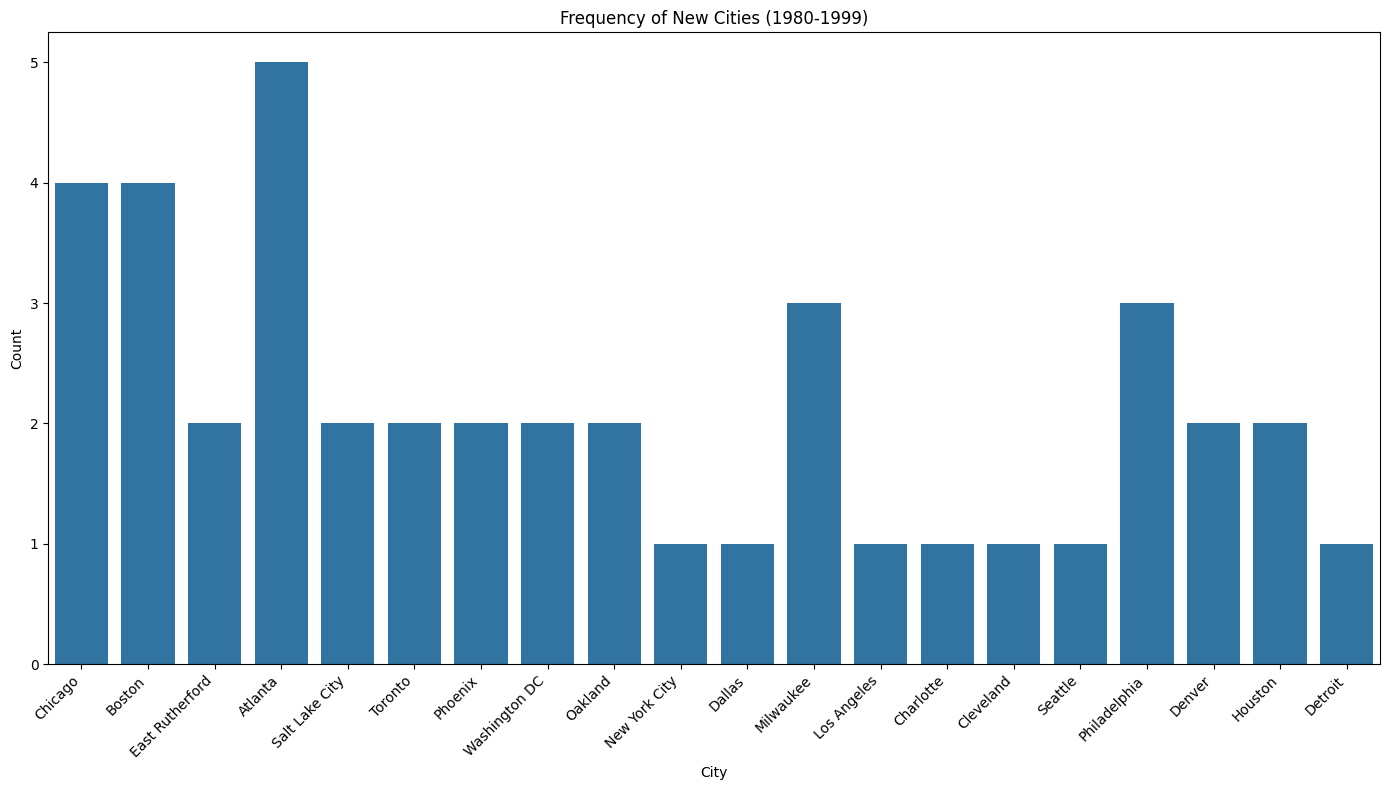

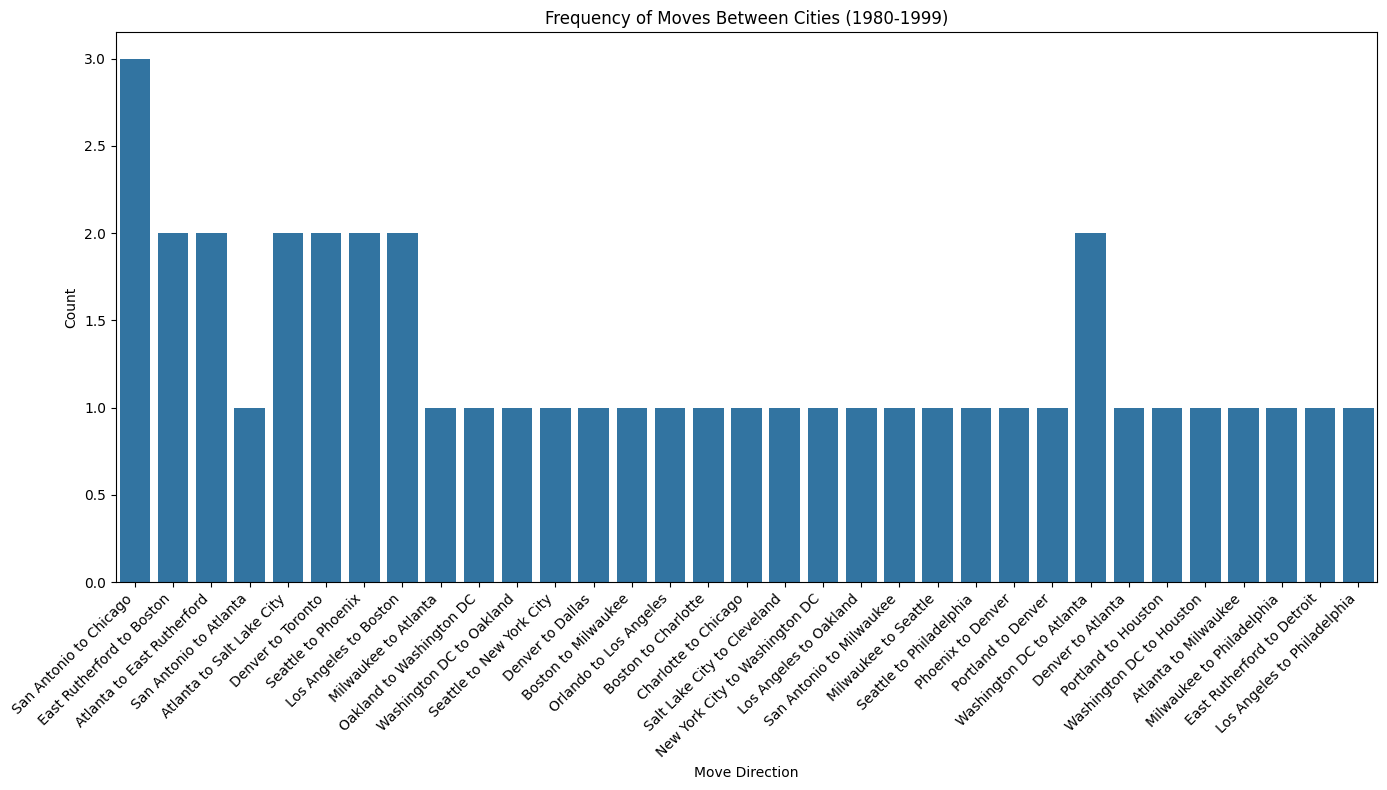

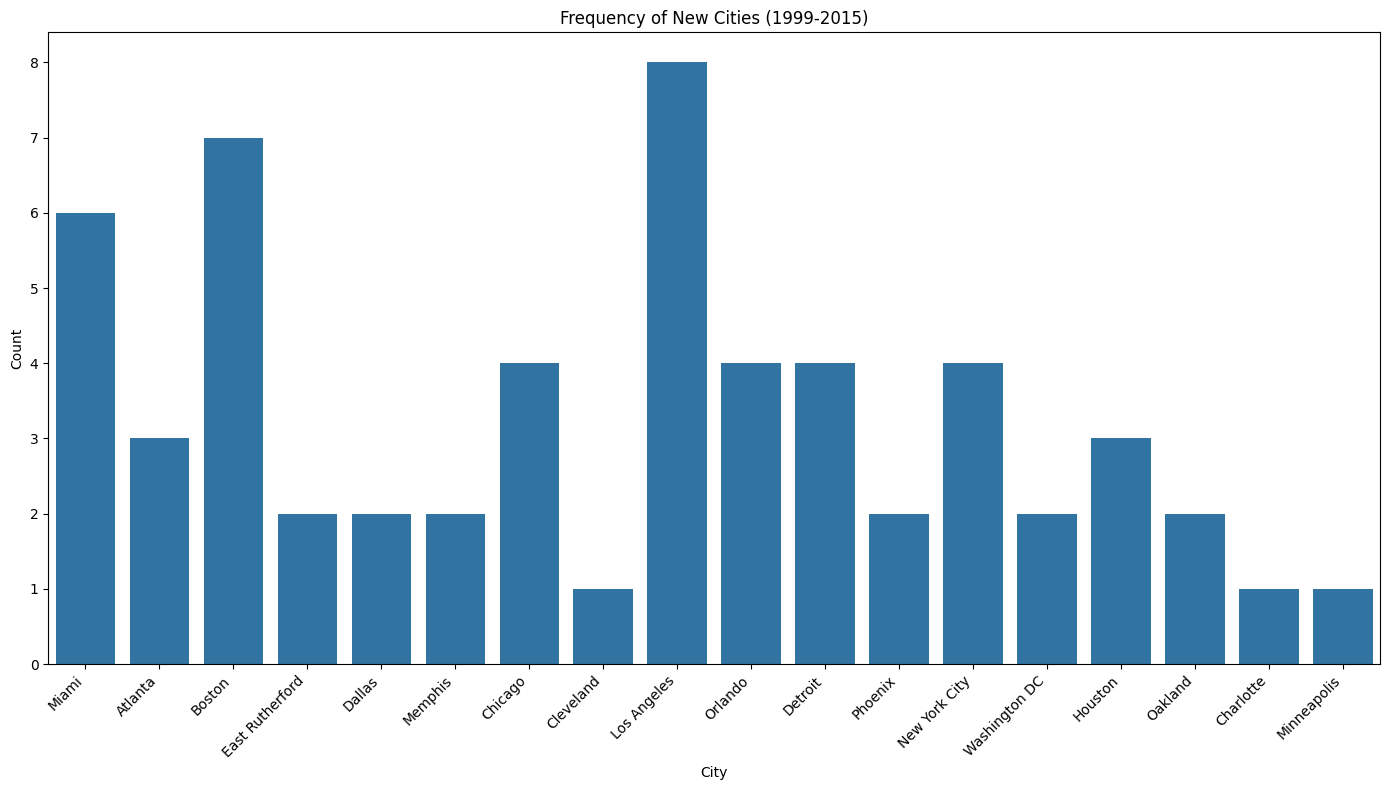

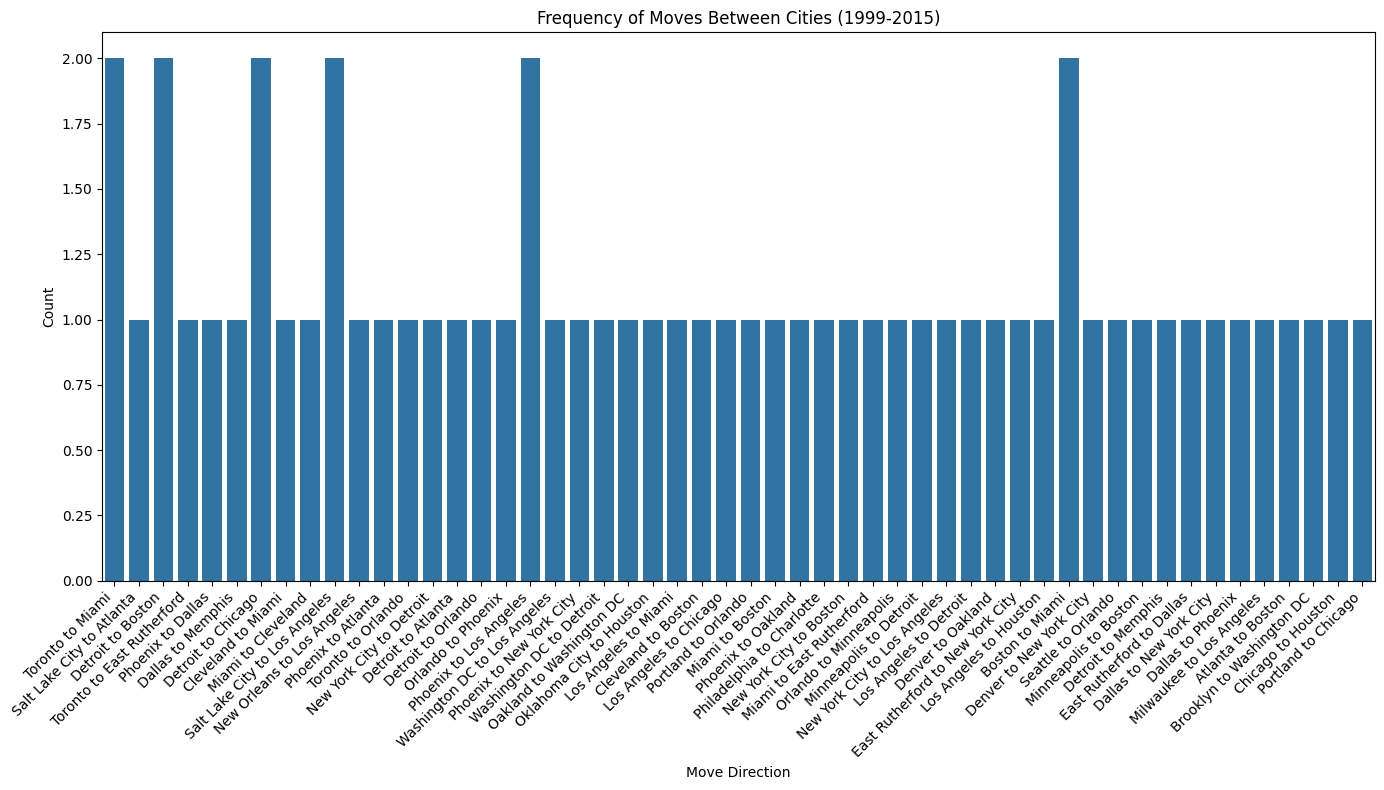

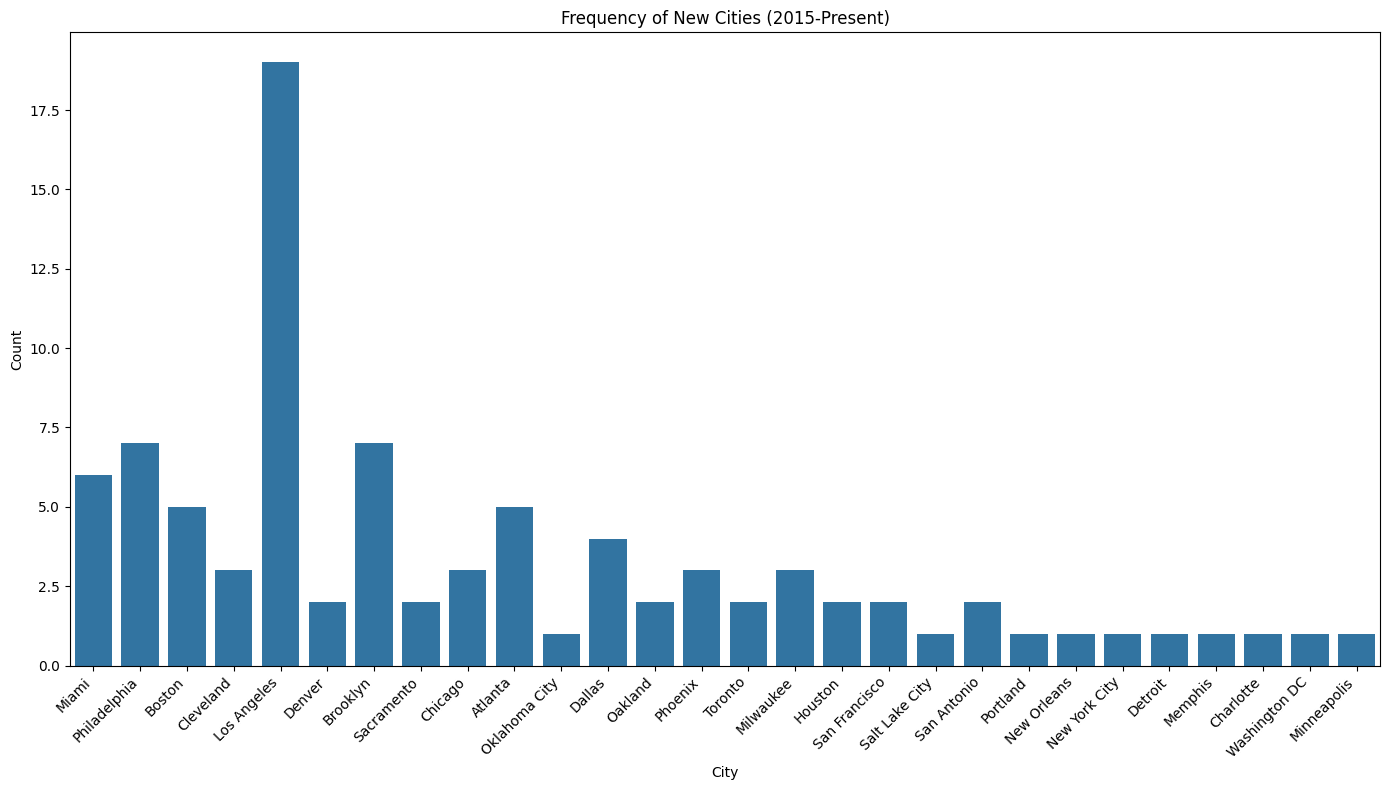

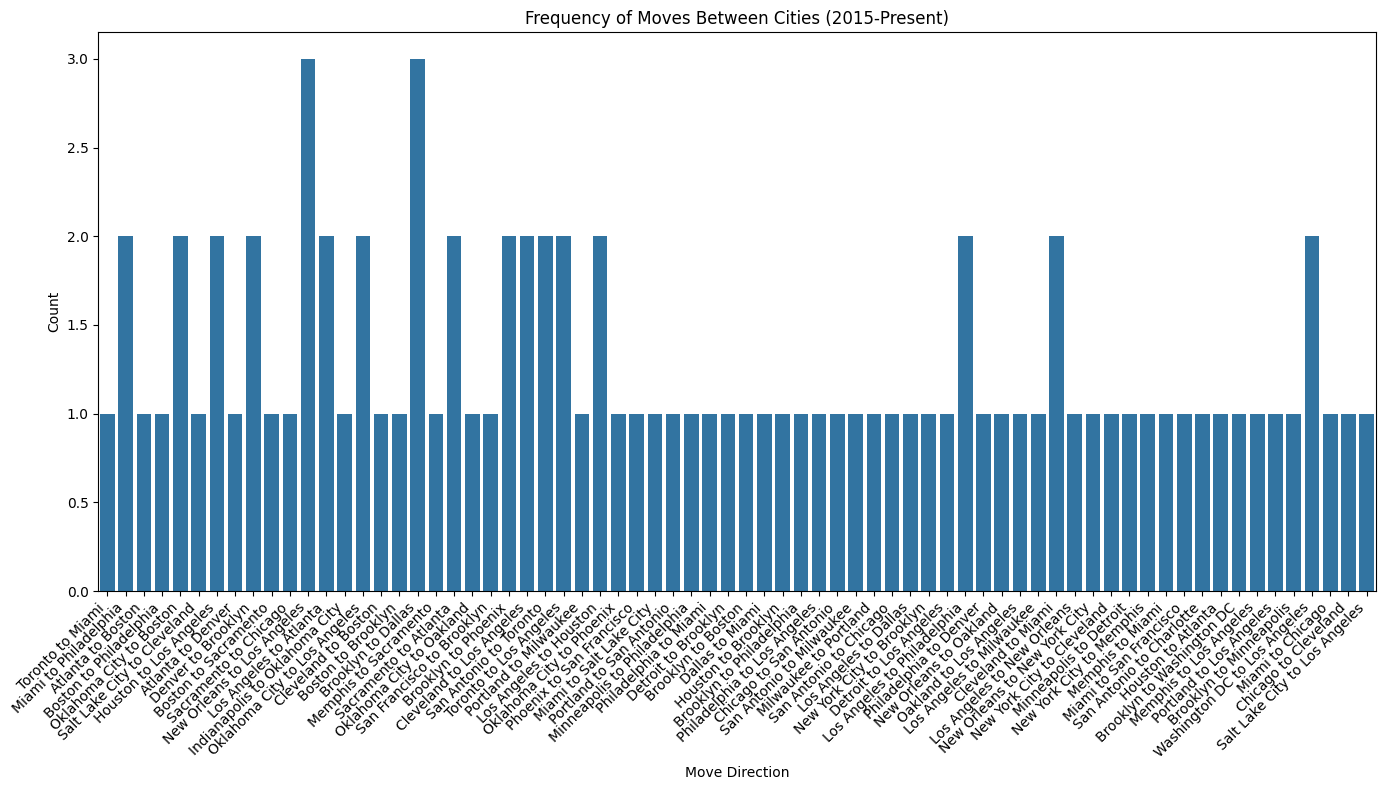

In [21]:
# Loop through each year bin and plot the graphs
for label in labels:
    # Filter data for the current bin
    bin_data = df[df['Year Bin'] == label].copy()
    
    if not bin_data.empty:
        # Frequency of new cities
        plot_and_save_frequency_bar_graph(bin_data, 'New City', f'Frequency of New Cities ({label})', 'City', 'Count', os.path.join(output_dir, f'new_city_frequency_{label}.png'))
        
        # Create a new column for the move direction
        bin_data['Move'] = bin_data['Former City'] + ' to ' + bin_data['New City']
        
        # Frequency of moves between cities
        plot_and_save_frequency_bar_graph(bin_data, 'Move', f'Frequency of Moves Between Cities ({label})', 'Move Direction', 'Count', os.path.join(output_dir, f'city_moves_frequency_{label}.png'))


In [22]:
print("Plots saved successfully!")

Plots saved successfully!
